<a href="https://colab.research.google.com/github/hyuntaedo/Data_Analysis/blob/main/Chipotle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<strong>탐색적 데이터 분석</strong>

-   row데이터를 관찰하는것

-   데이터의 출처와 주제
-   데이터의 크기
-   데이터의 구성 요소 를 탐색하는것

-   Feature -> 데이터의 요소

#<strong>Chiplet data분석</strong>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_name = '/content/drive/MyDrive/Data_Folder/data/chipotle.tsv'
data = pd.read_csv(file_name,sep='\t') #csv파일이 아닌경우 명시적으로 \t를 선언해 줘야지 읽힘
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
print(data.shape)
print("------------------------------")
print(data.info())

(4622, 5)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


1. 기초정보 탐색
2. 인사이트 발견(탐색, 시각화)
3. 데이터 전처리
4. 탐색적 분석

In [ ]:
data.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [ ]:
print(data.columns)
print("-------------------")
print(data.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
-------------------
RangeIndex(start=0, stop=4622, step=1)


In [ ]:
data['order_id'] = data['order_id'].astype(str) # order_id는 숫자의 의미를 가지지 않기 때문에 str로 변환
print(data.describe()) # 통계량 확인

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [ ]:
print(len(data['order_id'].unique())) # order_id 갯수를 출력
print(len(data['item_name'].unique())) # item_name 갯수를 출력

1834
50


In [ ]:
len(data['item_name'].value_counts()) #50개의 종류가 나옴

50

1. 수치형 feature 
-   연속형 feature : 어떤 구간 안의 모든 값을 데이터로써 
    가질 수 있다. 
-   비연속형 feature : 셀 수 있으며, 일정구간 안에서       
    정해진 몇개의 값을 가져야 한다.

2. 범주형 feature
-   순서있는 범주형 feature : 순서가 있으나 수치는 아님 
-   순서없는 범주형 feature : 데이터가 구분되면서도 순서가 
    없음

In [ ]:
item_count = data['item_name'].value_counts()[:10]
for idx, cnt in enumerate(item_count.iteritems(),1):
    print("top",idx, ":",idx,cnt)

top 1 : 1 ('Chicken Bowl', 726)
top 2 : 2 ('Chicken Burrito', 553)
top 3 : 3 ('Chips and Guacamole', 479)
top 4 : 4 ('Steak Burrito', 368)
top 5 : 5 ('Canned Soft Drink', 301)
top 6 : 6 ('Steak Bowl', 211)
top 7 : 7 ('Chips', 211)
top 8 : 8 ('Bottled Water', 162)
top 9 : 9 ('Chicken Soft Tacos', 115)
top 10 : 10 ('Chicken Salad Bowl', 110)


In [ ]:
order_count = data.groupby('item_name')['order_id'].count()
order_count[:10] #item당 주문 갯수를 출력

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [ ]:
item_quantity = data.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

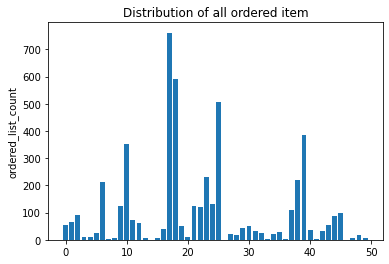

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
item_name_list = item_quantity.index.tolist() #주문 총량의 tolist index ->tolist는쓰기 편하게 python의 list로 변환
x_pos = np.arange(len(item_name_list))
order_count = item_quantity.values.tolist()

plt.bar(x_pos,order_count,align="center")
plt.ylabel('ordered_list_count')
plt.title("Distribution of all ordered item")
plt.show()

In [ ]:
print(data.info())
print('-------------------------')
data['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB
None
-------------------------


0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [ ]:
#column 단위 데이터에 apply함수로 전처리를 적용
data['item_price'] = data['item_price'].apply(lambda x: float(x[1:]))
data.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [ ]:
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#개념적 탐색




*   주문당 평균 계산금액
*   한 주문에 10 달러 이상 사용한 주문의 id출력
*   각 아이템의 가격 구하기
*   가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
*   Veggle Salad Bowl이 몇번 주문 되었는지 구하기
*   Chicken Bowl을 2개 이상 주문한 주문 횟수 구하기



In [ ]:
data.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [ ]:
#한 주문에 10 달러 이상 사용한 주문의 id
data_order_group = data.groupby('order_id').sum()
result = data_order_group[data_order_group.item_price >= 10]
print(result[:10])
print(result.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


In [ ]:
# 각 아이템의 가격
data_one_item = data[data.quantity == 1]
data_per_item = data_one_item.groupby('item_name').min()
data_per_item.sort_values(by = 'item_price', ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
